## Understanding the Data

Importing Data from Kaggel

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raisabentayhossain","key":"e54ada5da0c03123cdaee930eb7201bb"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           8662        282  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7033        167  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2115         71  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [8]:
!kaggle competitions download -c data-science-bowl-2018

100% 357M/358M [00:13<00:00, 28.6MB/s]
100% 358M/358M [00:13<00:00, 28.4MB/s]


In [9]:
!unzip /content/data-science-bowl-2018.zip

Archive:  /content/data-science-bowl-2018.zip
  inflating: stage1_sample_submission.csv.zip  
  inflating: stage1_solution.csv.zip  
  inflating: stage1_test.zip         
  inflating: stage1_train.zip        
  inflating: stage1_train_labels.csv.zip  
  inflating: stage2_sample_submission_final.csv.zip  
  inflating: stage2_test_final.zip   


Process the Images

In [10]:
import os

In [11]:
# unzip train folder

! mkdir train
!unzip /content/stage1_train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/160cf18b03df69978e2ed33335afcd781ebebf4ee42df566aaa6fd0aee66ac93.png  
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/16d3bf2426e9cda0e4f435de3a0c260d17be460f1c834c1282dfd68f9fcf7509.png  
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1cfe69ef1dec8963e05ba8386a956af0073ba0bec2cc8ba534df81ef6dee905a.png  
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1d2543cd2a8134ac2ca091a230bd15270826f8dd83c6594550b7f0fc85a15f8e.png  
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/24b50e6e3406e513d47ddfa9bd85505a95a266858cffc730a9ad7bc99936b800.png  
  inflating: train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/341193ff7f035f118eabe993464e402c5485ff014e095ff5e940a0

In [12]:
# unzip test folder

! mkdir test
!unzip /content/stage1_test.zip -d test

Archive:  /content/stage1_test.zip
   creating: test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/
   creating: test/0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac/
   creating: test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/
   creating: test/0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925/
   creating: test/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6/
   creating: test/0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466/
   creating: test/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c/
   creating: test/17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff/
   creating: test/1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b/
   creating: test/191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829/
   creating: test/1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a/
   creating: test/1cdbfee1951356e7b0a2150

In [13]:
# define folder path

train_path = '/content/train'
test_path = '/content/test'

In [18]:
# get train and test ids

train_id = next(os.walk(train_path))[1]
test_id = next(os.walk(test_path))[1]

In [ ]:
train_id

In [19]:
import numpy as np

In [41]:
# creat an empty array for train data and label

X_train = np.zeros((len(train_id),128,128,3), dtype = np.uint8)
y_train = np.zeros((len(train_id),128,128,1), dtype = np.bool)

<ipython-input-41-b287e7572106>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.zeros((len(train_id),128,128,1), dtype = np.bool)


In [ ]:
X_train

In [27]:
from skimage.io import imread
from skimage.transform import resize

In [42]:
# read and resize images

for n, id in enumerate(train_id):
  f_name = train_path + '/'+ id + '/images/' + id + '.png'
  img = imread(f_name)[:,:,:3]  
  img = resize(img, (128,128), mode='constant', preserve_range= True)
  X_train[n] = img
  mask = np.zeros((128,128,1),dtype = bool)
  for mask_file in next(os.walk(train_path + '/'+ id + '/masks/'))[2]:
        mask_ = imread(train_path + '/'+ id + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (128, 128), mode='constant',  preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
  y_train[n] = mask  

In [44]:
from skimage.io import imshow
import matplotlib.pyplot as plt

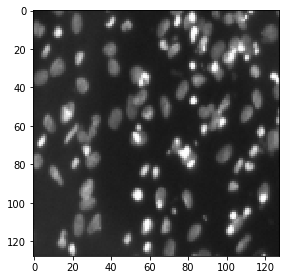

In [47]:
imshow(X_train[20])
plt.show()

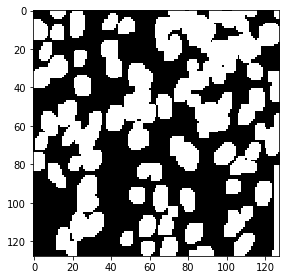

In [48]:
imshow(y_train[20])
plt.show()

In [49]:
# read and resize test images

X_test = np.zeros((len(test_id),128,128,3), dtype = np.uint8)
sizes_test_img = []

for n, id in enumerate(test_id):
  f_name = test_path + '/'+ id + '/images/' + id + '.png'
  img = imread(f_name)[:,:,:3]  
  sizes_test_img.append([img.shape[0], img.shape[1]])
  img = resize(img, (128,128), mode='constant', preserve_range= True)
  X_test[n] = img

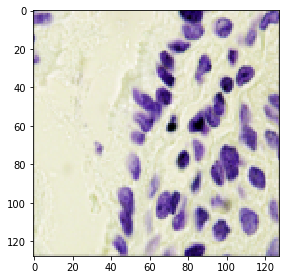

In [50]:
imshow(X_test[20])
plt.show()

## Building U-net

Layers: Input -> (conv -> dropout -> conv -> maxpool)*4 -> (conv -> dropout -> conv) -> (upscale -> concate -> conv -> dropout -> conv)*4 -> output

In [51]:
# import dependencies

import keras
from keras import layers

In [52]:
input = layers.Input((128,128,3))
s = layers.Lambda(lambda x: x/255)(input)

c1 = layers.Conv2D(16,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(s)
c1 = layers.Dropout(0.1)(c1)
c1 = layers.Conv2D(16,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c1)
p1 = layers.MaxPool2D((2,2))(c1)

c2 = layers.Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(p1)
c2 = layers.Dropout(0.1)(c2)
c2 = layers.Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c2)
p2 = layers.MaxPool2D((2,2))(c2)

c3 = layers.Conv2D(64,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(p2)
c3 = layers.Dropout(0.1)(c3)
c3 = layers.Conv2D(64,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c3)
p3 = layers.MaxPool2D((2,2))(c3)

c4 = layers.Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(p3)
c4 = layers.Dropout(0.1)(c4)
c4 = layers.Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c4)
p4 = layers.MaxPool2D((2,2))(c4)

c5 = layers.Conv2D(256,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(p4)
c5 = layers.Dropout(0.1)(c5)
c5 = layers.Conv2D(256,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c5)


u6 = layers.Conv2DTranspose(128,(2,2),strides=(2,2), padding = 'same')(c5)
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(u6)
c6 = layers.Dropout(0.1)(c6)
c6 = layers.Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c6)


u7 = layers.Conv2DTranspose(64,(2,2),strides=(2,2), padding = 'same')(c6)
u7 = layers.concatenate([u7,c3])
c7 = layers.Conv2D(64,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(u7)
c7 = layers.Dropout(0.1)(c7)
c7 = layers.Conv2D(64,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c7)


u8 = layers.Conv2DTranspose(32,(2,2),strides=(2,2), padding = 'same')(c7)
u8 = layers.concatenate([u8,c2])
c8 = layers.Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(u8)
c8 = layers.Dropout(0.1)(c8)
c8 = layers.Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c8)


u9 = layers.Conv2DTranspose(16,(2,2),strides=(2,2), padding = 'same')(c8)
u9 = layers.concatenate([u9,c1])
c9 = layers.Conv2D(16,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(u9)
c9 = layers.Dropout(0.1)(c9)
c9 = layers.Conv2D(16,(3,3), padding='same', activation='relu', kernel_initializer= 'he_normal')(c9)


output = layers.Conv2D(1,(1,1), activation = 'sigmoid')(c9)

model = keras.Model(inputs = [input], outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [53]:
# compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [54]:
# early stop and checkpoints

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta= 0.2, patience = 10, verbose = 1, mode = 'auto')
mcp = ModelCheckpoint(monitor='val_loss', filepath= './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cb = [es, mcp]

In [55]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks= cb)

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.7567
Epoch 1: val_loss improved from inf to 0.31410, saving model to ./bestmodel.h5
38/38 [==============================] - 135s 3s/step - loss: 0.5264 - accuracy: 0.7567 - val_loss: 0.3141 - val_accuracy: 0.8287
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.8830
Epoch 2: val_loss improved from 0.31410 to 0.21612, saving model to ./bestmodel.h5
38/38 [==============================] - 124s 3s/step - loss: 0.2443 - accuracy: 0.8830 - val_loss: 0.2161 - val_accuracy: 0.9284
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9403
Epoch 3: val_loss improved from 0.21612 to 0.15320, saving model to ./bestmodel.h5
38/38 [==============================] - 124s 3s/step - loss: 0.1626 - accuracy: 0.9403 - val_loss: 0.1532 - val_accuracy: 0.9465
Epoch 4/25
38/38 [==============================] - ETA: 0s - loss: 0.1378 - accura

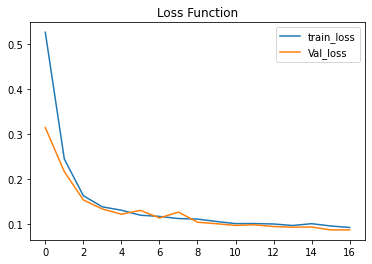

In [60]:
# loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss Function')
plt.legend(['train_loss', 'Val_loss'])
plt.show()

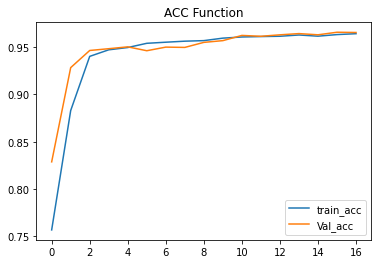

In [61]:
# accuarcy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('ACC Function')
plt.legend(['train_acc', 'Val_acc'])
plt.show()

In [56]:
# load best model

from keras.models import load_model

best_model = load_model("/content/bestmodel.h5")
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [57]:
train_pred = best_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
val_pred = best_model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
test_pred = best_model.predict(X_test, verbose=1)

3/3 [==============================] - 4s 1s/step


In [58]:
value_train = (train_pred > 0.5).astype(np.uint8)
value_val = (val_pred > 0.5).astype(np.uint8)
value_test = (test_pred > 0.5).astype(np.uint8)

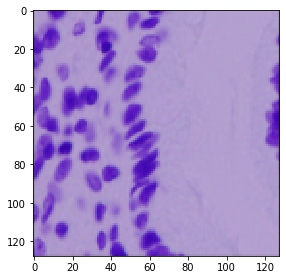

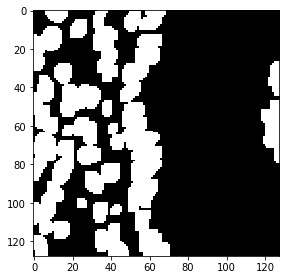

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


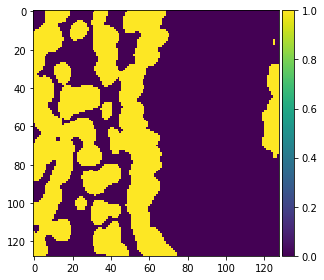

In [59]:
import random

ix = random.randint(0, len(value_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(value_train[ix]))
plt.show()